In [1]:
!pip3 install -Uqq duckduckgo_search -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip3 install fastcore -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip3 install -Uqq fastai -i https://pypi.tuna.tsinghua.edu.cn/simple

from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=50): 
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [2]:
urls = search_images(
    'filet mignon', 
    max_images=1
)
urls[0]

'https://www.hickoryfarms.com/on/demandware.static/-/Sites-Web-Master-Catalog/default/dw05b56220/images/products/4ct-8-oz-filet-mignon-060026-m1.jpg'

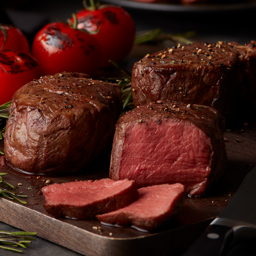

In [3]:
from fastdownload import download_url
dest = 'filet.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

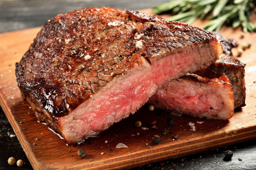

In [6]:
download_url(
    search_images('steak photo', max_images=1)[0], 
    'steak.jpg', show_progress=False
)
Image.open('steak.jpg').to_thumb(256,256)

In [7]:
searches = 'filet mignon','steak photo'
path = Path('filet_steak')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [8]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

7

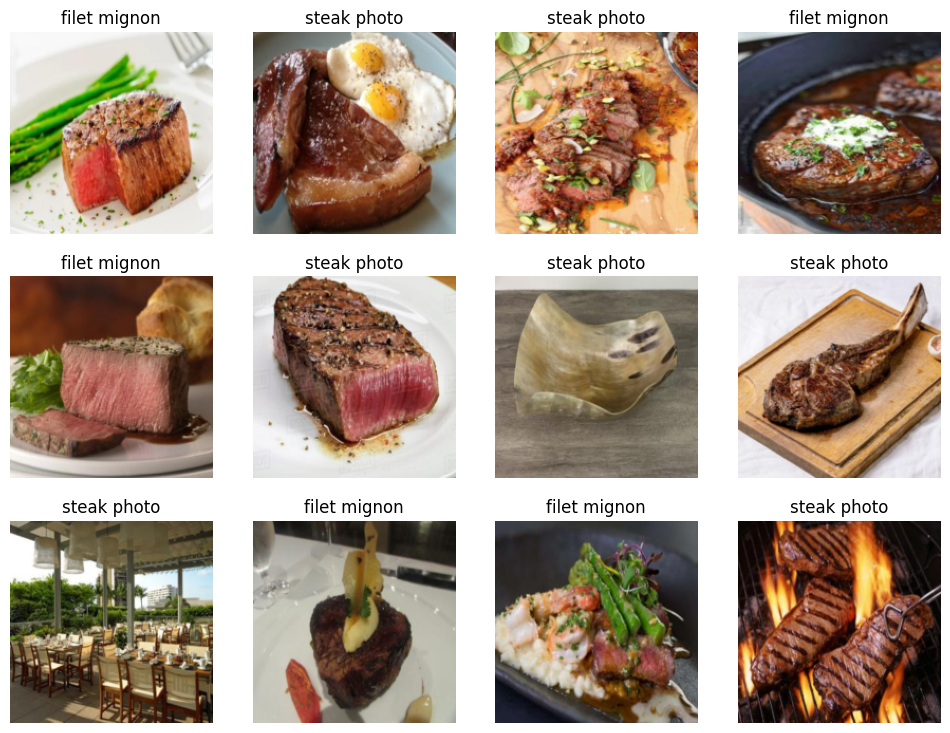

In [9]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=12)